#  Project: Credit Card Fraud Detection
## - Table of Contents
## - Introduction
## - Data Wrangling
## - Exploratory Data Analysis
## - Applying the right model
## - Conclusions

### Introduction
This data set is enconded,so basically we wont be finding time series we will major our focus on random forest classifiers,extra tress classifier,adaboost etc and neural networks. .

In this first step, I’ll import the necessary libraries to import the data. After that, I’ll perform some basic commands to understand the structure of the data.

This analysis looks at two major questions;

How to detect credit card fraud?
Which model is best for credit card fraud detection?

### Data Wrangling
In this section of the report, we will load in the data, check for cleanliness, 
    and then trim and clean the dataset for analysis.


In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
#Read the given CSV file, and view some sample records
df = pd.read_csv("creditcard.csv")

In [3]:
pd.set_option('display.max_columns', 31)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#printing the shape of the data
print("Shape of Fraud Data: \n{}".format(df.shape))

Shape of Fraud Data: 
(284807, 31)


In [5]:
print('*'*23)
df.info()
print("*"*23)
df.isnull().sum()
print("**"*12)
df.shape

***********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null 

(284807, 31)

In [6]:
#describing the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Checking how many Frauds there are as well as the percentage of Fraudulent and Normal Transactions

Number_of_Frauds =  df['Class'].value_counts()[1]
Number_of_NonFrauds = df['Class'].value_counts()[0]


print("Number of Fraud Values: {}".format(Number_of_Frauds))
print("Number of Non Fraud Values: {}".format(Number_of_NonFrauds))
print("\n")
print("Percentage of Fraud Transactions: {}".format(round(Number_of_Frauds/len(df)*100,3)))
print("Percentage of Non Fraud Transactions: {}".format(round(Number_of_NonFrauds/len(df)*100,3)))

Number of Fraud Values: 492
Number of Non Fraud Values: 284315


Percentage of Fraud Transactions: 0.173
Percentage of Non Fraud Transactions: 99.827


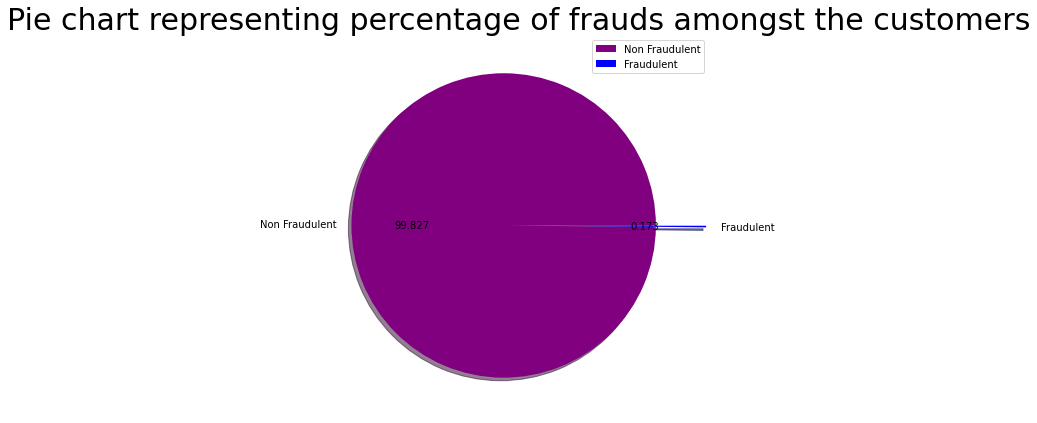

In [8]:
labels = ['Non Fraudulent', 'Fraudulent']
colors = ['purple', 'blue']
size = [284315, 492]
explode = [0.1, 0.23]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct='%.3f', shadow = True)
plt.title('Pie chart representing percentage of frauds amongst the customers', fontsize = 30)
plt.legend()
plt.show()

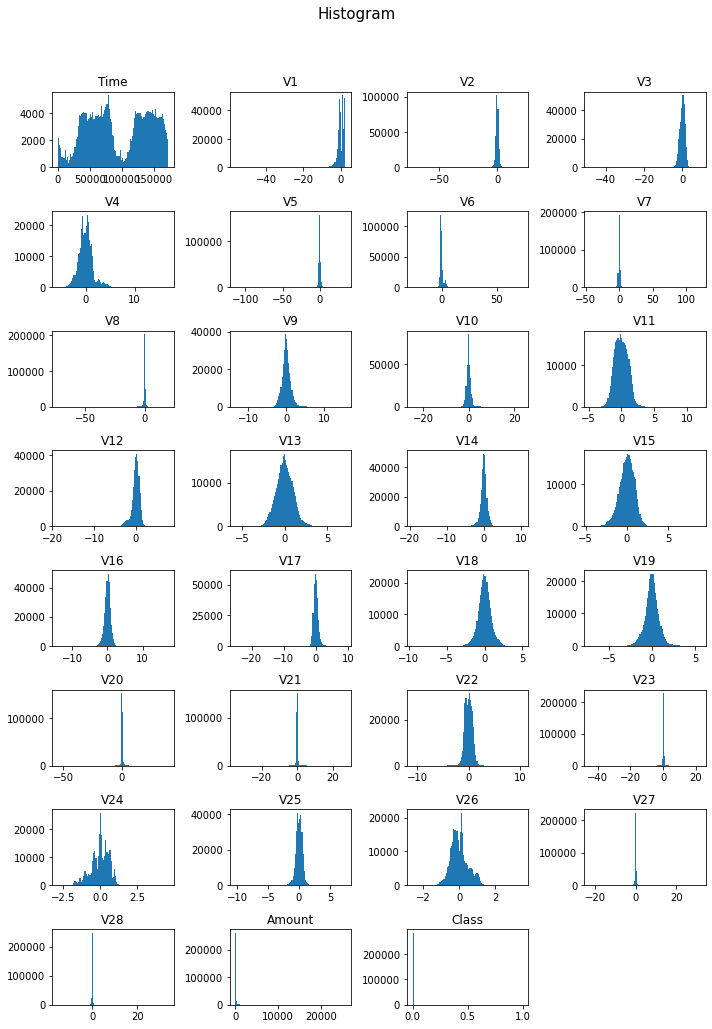

In [9]:
fraudfig = plt.figure(figsize=(10, 15))
plt.suptitle("Histogram", fontsize=15)
for i in range(df.shape[1]):
  plt.subplot(8, 4, i + 1)
  w = plt.gca()
  w.set_title(df.columns.values[i])
  
  vals = np.size(df.iloc[:, 1].unique())
  if vals >= 100:
    vals = 100

  plt.hist(df.iloc[:, i], bins = vals)
plt.tight_layout(rect=(0, 0.03, 1, 0.95))

<AxesSubplot:>

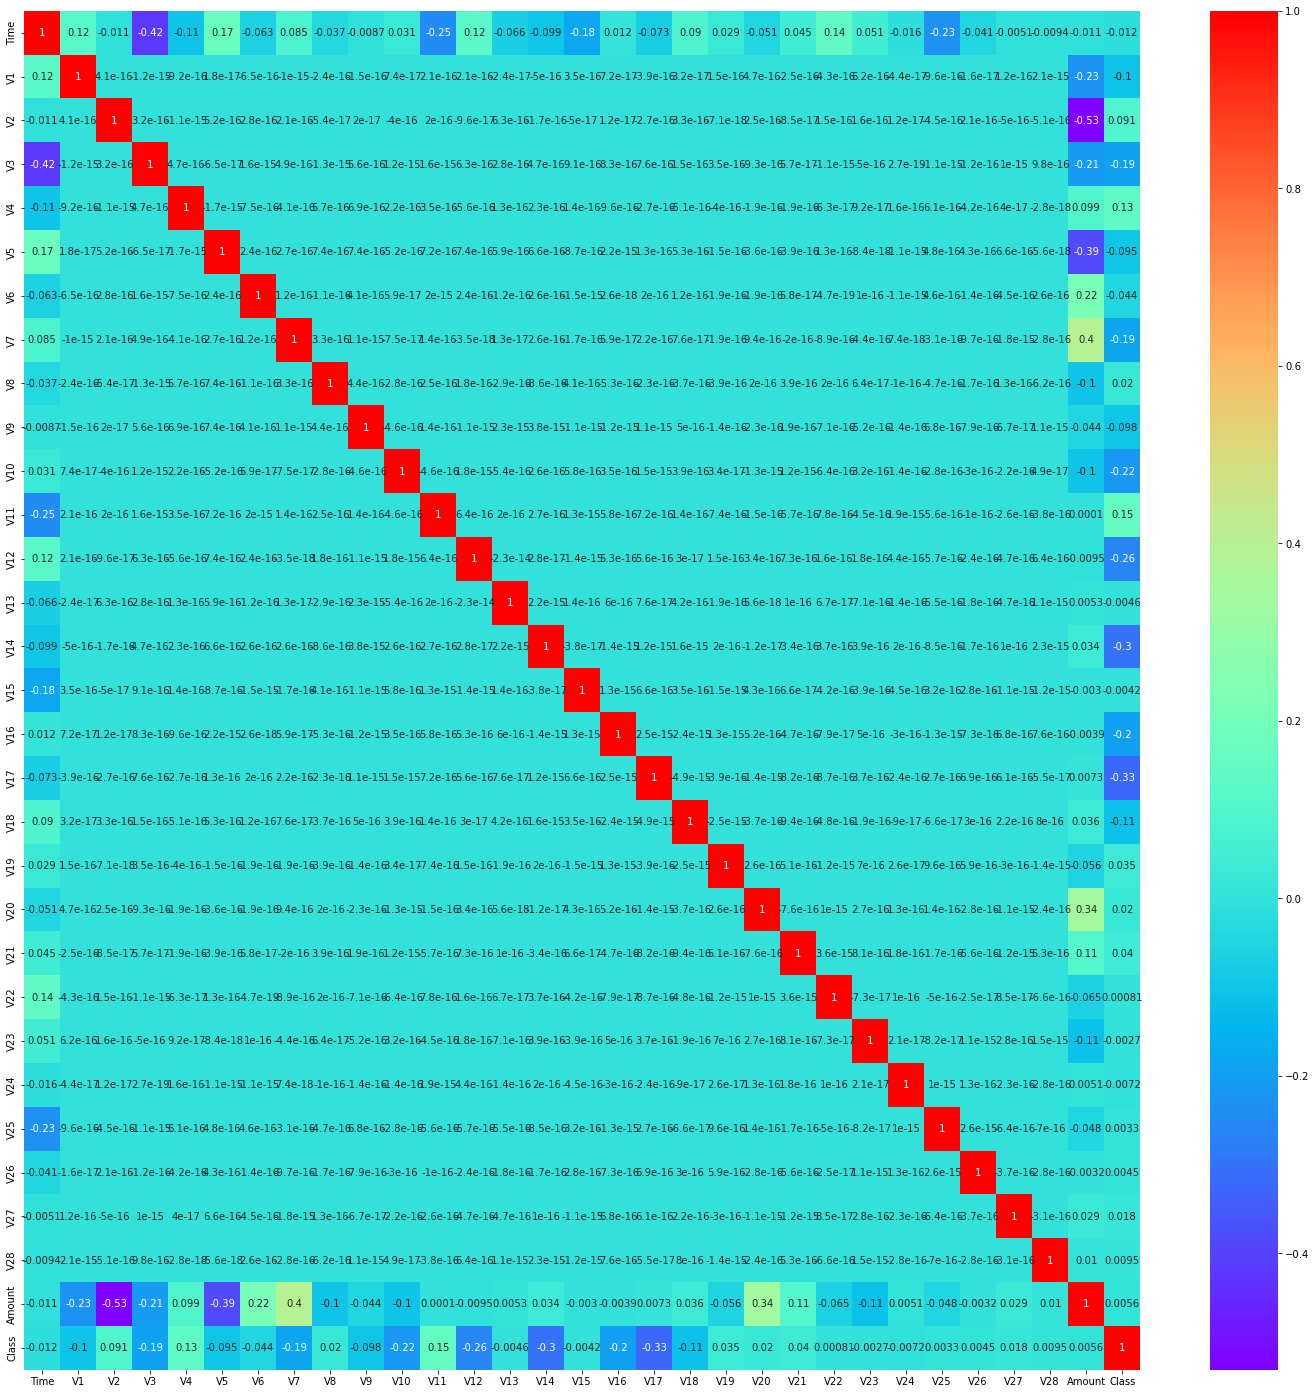

In [10]:
plt.figure(figsize= (25,25))
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

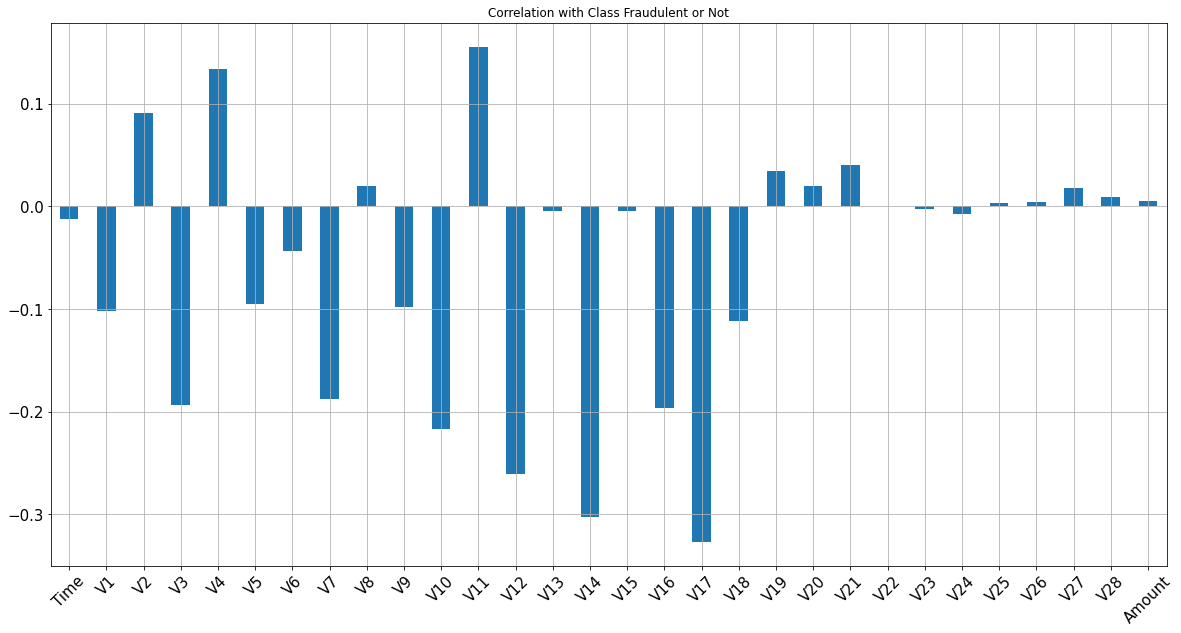

In [11]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
d2 = df.drop(columns = ['Class'])   # drop non numerical columns
d2.corrwith(df.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

In [12]:
# Thus, we cannot use linear models to predict the outcome effectively.
# We will try decision tree, random forest, xgboost and lgbm classifiers on this data

### Modeling and Feature selection/importances

In [13]:
import imblearn
from imblearn.over_sampling import SMOTE

In [14]:
x = df.drop(columns='Class', axis="columns")
y = df["Class"]

In [15]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)
print("upsampling the imbalance label (y) :\n", y_sm.value_counts())

upsampling the imbalance label (y) :
 0    284315
1    284315
Name: Class, dtype: int64


In [16]:
model = ExtraTreesClassifier()
model.fit(x_sm, y_sm)

ExtraTreesClassifier()

In [17]:
model.feature_importances_

array([0.01122704, 0.01846612, 0.01427167, 0.05481165, 0.15847144,
       0.01095956, 0.00808462, 0.02402893, 0.00604372, 0.03238088,
       0.05846732, 0.10694702, 0.10048633, 0.00656094, 0.13840586,
       0.0052947 , 0.04200889, 0.10394831, 0.03399996, 0.0132438 ,
       0.00430218, 0.00849454, 0.00555313, 0.00330776, 0.00594212,
       0.00446762, 0.006432  , 0.00523303, 0.00375316, 0.00440569])

<AxesSubplot:>

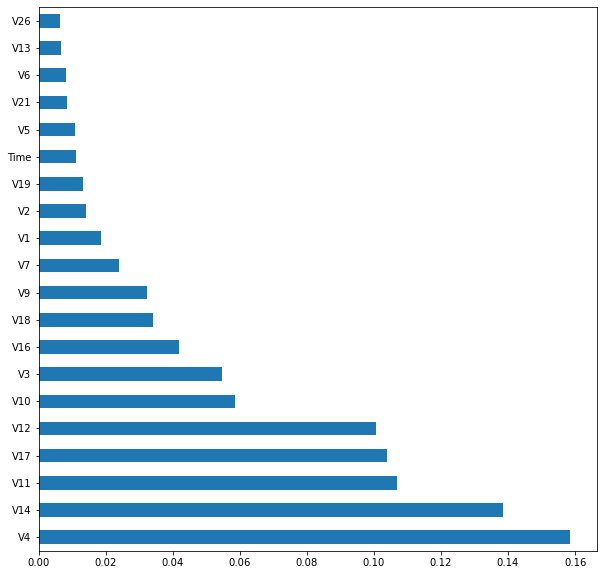

In [18]:
plt.figure(figsize=(10,10))
feat = pd.Series(model.feature_importances_, index=x_sm.columns)
feat.nlargest(20).plot(kind='barh') #Top 20 important features

In [19]:
plot = feat.nlargest(20) 
print(plot.index)

Index(['V4', 'V14', 'V11', 'V17', 'V12', 'V10', 'V3', 'V16', 'V18', 'V9', 'V7',
       'V1', 'V2', 'V19', 'Time', 'V5', 'V21', 'V6', 'V13', 'V26'],
      dtype='object')


In [20]:
selected_cols = ['V14', 'V12', 'V4', 'V17', 'V11', 'V3', 'V16', 'V10', 'V18', 'V9', 'V2',
                               'V1', 'V19', 'V7', 'Time', 'V6', 'V13', 'V5', 'V27', 'V8']

In [21]:
x_new = x_sm[selected_cols]
print('Shape before selection:', x_sm.shape)
print("Shape after selection:", x_new.shape)

Shape before selection: (568630, 30)
Shape after selection: (568630, 20)


### Train/Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y_sm, test_size=0.30, random_state=42)

### Model Fitting

In [38]:
from sklearn.metrics import RocCurveDisplay, accuracy_score

# Decision Tree Classifier

In [24]:
dec = DecisionTreeClassifier()
dec.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
pred_dec = dec.predict(X_test)
pred_dec

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [39]:
from sklearn.metrics import roc_auc_score

r1 = roc_auc_score(y_test, pred_dec)
a1 = accuracy_score(y_test, pred_dec)

print("Area under precision recall curve : ", round(r1, 7))
print("Accuracy score :", round(a1, 7))

Area under precision recall curve :  0.9979531
Accuracy score : 0.9979541


# Random Forest Classifier

In [27]:
rand = RandomForestClassifier()
rand.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
pred_ran = rand.predict(X_test)
pred_ran

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [40]:
from sklearn.metrics import roc_auc_score

r2 = roc_auc_score(y_test, pred_ran)
a2 = accuracy_score(y_test, pred_ran)

print("Area under precision recall curve : ", round(r2, 7))
print("Accuracy score :", round(a2, 7))

Area under precision recall curve :  0.9998299
Accuracy score : 0.99983


# XGBoost Classifier

In [31]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\Anaconda_orig\envs\geo-env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:00:12] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
pred_xgb = xgb.predict(X_test)
pred_xgb

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [41]:
from sklearn.metrics import roc_auc_score

r3 = roc_auc_score(y_test, pred_xgb)
a3 = accuracy_score(y_test, pred_xgb)

print("Area under precision recall curve : ", round(r3, 7))
print("Accuracy score :", round(a3, 7))

Area under precision recall curve :  0.9997652
Accuracy score : 0.9997655


# LightGBM Classifier

In [34]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [35]:
pred_lgbm = lgbm.predict(X_test)
pred_lgbm

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [42]:
from sklearn.metrics import roc_auc_score

r4 = roc_auc_score(y_test, pred_lgbm)
a4 = accuracy_score(y_test, pred_lgbm)

print("Area under precision recall curve : ", round(r4, 7))
print("Accuracy score :", round(a4, 7))

Area under precision recall curve :  0.9990203
Accuracy score : 0.999021


# Final Decision of which model to use

In [49]:
dictf = {'DecisionTreeClassifier' : [r1,a1], 'RandomForestClassifier' : [r2,a2], 'XGBClassifier' : [r3,a3], 'LightGBMClassifier' : [r4,a4]}
final = pd.DataFrame.from_dict(dictf, orient='index',columns = ['Area under ROC Curve', 'Accuracy'])
final = final.style.highlight_max(color = 'lightgreen', axis = 0)

final

,Area under ROC Curve,Accuracy
DecisionTreeClassifier,0.997953,0.997954
RandomForestClassifier,0.999830,0.999830
XGBClassifier,0.999765,0.999766
LightGBMClassifier,0.999020,0.999021


## Clearly, the best Area under ROC Curve and Accuracy is given by the Random Forest Classifier. We go ahead to deploy model using this classifier
